!nvidia-smi

In [1]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [2]:
! pip install ultralytics supervision inference tqdm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.7/105.7 kB 4.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.4/99.4 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 24.2 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB

In [3]:
! pip install -q git+https://github.com/roboflow/sports.git


  Preparing metadata (setup.py) ... done


In [36]:
# !gdown -O "0bfacc_0.mp4" "https://drive.google.com/uc?id=12TqauVZ9tLAv8kWxTTBFWtgt2hNQ4_ZF"
# !gdown -O "2e57b9_0.mp4" "https://drive.google.com/uc?id=19PGw55V8aA6GZu5-Aac5_9mCy3fNxmEf"
# !gdown -O "08fd33_0.mp4" "https://drive.google.com/uc?id=1OG8K6wqUw9t7lp9ms1M48DxRhwTYciK-"
# !gdown -O "573e61_0.mp4" "https://drive.google.com/uc?id=1yYPKuXbHsCxqjA9G-S6aeR2Kcnos8RPU"
!gdown -O "121364_0.mp4" "https://drive.google.com/uc?id=1vVwjW1dE1drIdd4ZSILfbCGPD4weoNiu"

Downloading...
From: https://drive.google.com/uc?id=1vVwjW1dE1drIdd4ZSILfbCGPD4weoNiu
To: /content/121364_0.mp4
100% 17.2M/17.2M [00:00<00:00, 19.3MB/s]


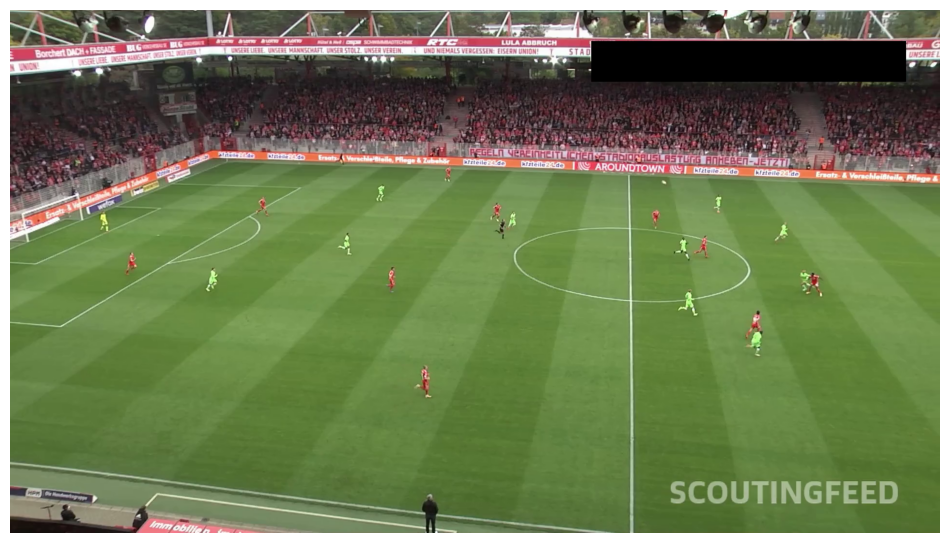

In [37]:
import supervision as sv

SOURCE_VIDEO_PATH = "/content/121364_0.mp4"

frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
frame = next(frame_generator)

sv.plot_image(frame)

In [6]:
# from IPython.display import Image, display
# display(Image('/content/runs/detect/predict/image0.jpg', width=600))


In [7]:
from inference import get_model
from google.colab import userdata

# ROBOFLOW_API_KEY = userdata.get('ROBOFLOW_API_KEY')
PLAYER_DETECTION_MODEL_ID = "football-players-detection-3zvbc/11"
PLAYER_DETECTION_MODEL = get_model(model_id=PLAYER_DETECTION_MODEL_ID, api_key='fwUmnyRPCwz4KDuRKJOe')

ModelDependencyMissing: Your `inference` configuration does not support SAM model. Use pip install 'inference[sam]' to install missing requirements.To suppress this warning, set CORE_MODEL_SAM_ENABLED to False.
ModelDependencyMissing: Your `inference` configuration does not support SAM2 model. Use pip install 'inference[sam]' to install missing requirements.To suppress this warning, set CORE_MODEL_SAM2_ENABLED to False.
ModelDependencyMissing: Your `inference` configuration does not support SAM3 model. Install SAM3 dependencies and set CORE_MODEL_SAM3_ENABLED to True.
ModelDependencyMissing: Your `inference` configuration does not support Gaze Detection model. Use pip install 'inference[gaze]' to install missing requirements.To suppress this warning, set CORE_MODEL_GAZE_ENABLED to False.


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


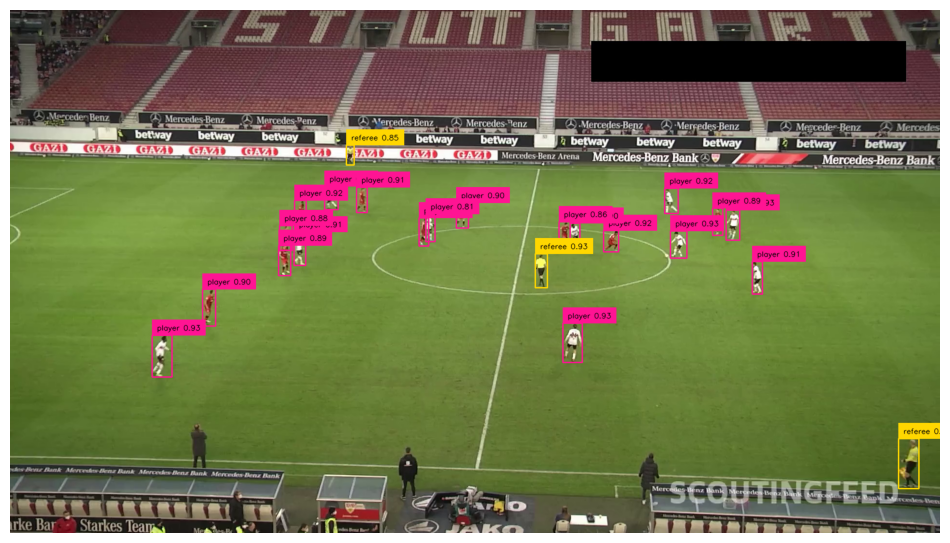

In [ ]:

SOURCE_VIDEO_PATH = "/content/121364_0.mp4"


box_annotator = sv.BoxAnnotator(
    color=sv.ColorPalette.from_hex(['#FF8C00', '#00BFFF', '#FF1493', '#FFD700']),
    thickness=2
) # box_annotator = sv.BoxAnnotator()

label_annotator = sv.LabelAnnotator(
    color=sv.ColorPalette.from_hex(['#FF8C00', '#00BFFF', '#FF1493', '#FFD700']),
    text_color=sv.Color.from_hex('#000000')
)

frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
frame = next(frame_generator)

result = PLAYER_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
detections = sv.Detections.from_inference(result)

labels = [
    f"{class_name} {confidence:.2f}"
    for class_name, confidence
    in zip(detections['class_name'], detections.confidence)
]

annotated_frame = frame.copy()
annotated_frame = box_annotator.annotate(
    scene=annotated_frame,
    detections=detections)
annotated_frame = label_annotator.annotate(
    scene=annotated_frame,
    detections=detections,
    labels=labels)

sv.plot_image(annotated_frame)

In [ ]:
import supervision as sv
from tqdm import tqdm

SOURCE_VIDEO_PATH = "/content/121364_0.mp4"
TARGET_VIDEO_PATH = "/content/annotated_output_video1.mp4"


box_annotator = sv.BoxAnnotator(
    color=sv.ColorPalette.from_hex(['#FF8C00', '#00BFFF', '#FF1493', '#FFD700']),
    thickness=2
) # box_annotator = sv.BoxAnnotator()

label_annotator = sv.LabelAnnotator(
    color=sv.ColorPalette.from_hex(['#FF8C00', '#00BFFF', '#FF1493', '#FFD700']),
    text_color=sv.Color.from_hex('#000000')
)

video_info = sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)
video_sink = sv.VideoSink(TARGET_VIDEO_PATH, video_info=video_info)

frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
#frame = next(frame_generator)
with video_sink:
    for frame in tqdm(frame_generator,total=video_info.total_frames):
        result = PLAYER_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
        detections = sv.Detections.from_inference(result)

        labels = [
            f"{class_name} {confidence:.2f}"
            for class_name, confidence
            in zip(detections['class_name'], detections.confidence)
        ]

        annotated_frame = frame.copy()
        annotated_frame = box_annotator.annotate(
            scene=annotated_frame,
            detections=detections)
        annotated_frame = label_annotator.annotate(
            scene=annotated_frame,
            detections=detections,
            labels=labels)
        #sv.write_video_frame(TARGET_VIDEO_PATH, annotated_frame)
        video_sink.write_frame(annotated_frame)

  1%|          | 9/750 [01:32<2:07:32, 10.33s/it]

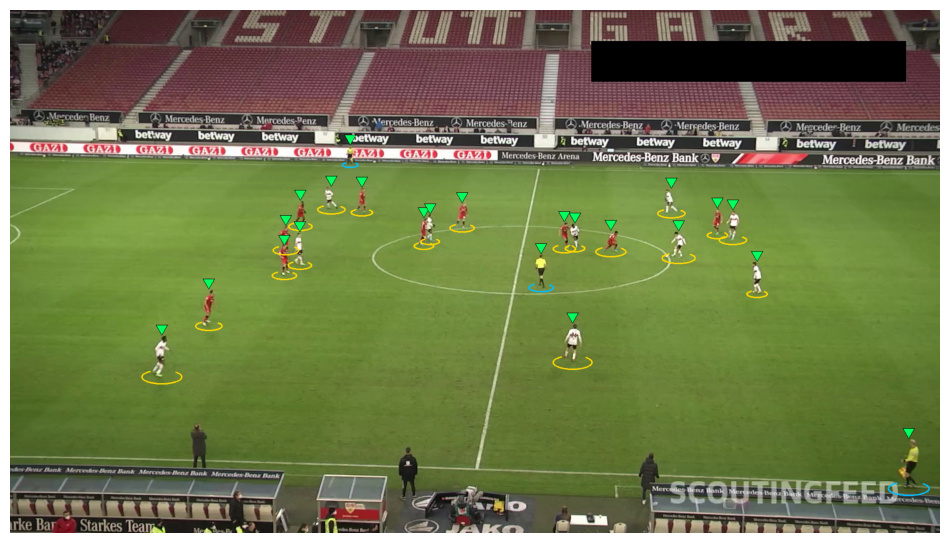

In [ ]:
ellip_annotator = sv.EllipseAnnotator(
    color=sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
    thickness=2
)

#trace_annotator = sv.TraceAnnotator()
trangle_annotator = sv.TriangleAnnotator(
    color=sv.Color.from_hex("#00FF5E"),
    base=25,
    height=21,
    outline_thickness=1
)

annotated_frame = frame.copy()
annotated_frame = ellip_annotator.annotate(
    scene=annotated_frame,
    detections=detections)
# annotated_frame = trace_annotator.annotate(
#     scene=annotated_frame,
#     detections=detections,)
annotated_frame = trangle_annotator.annotate(
    scene=annotated_frame,
    detections=detections)

sv.plot_image(annotated_frame)

# Started the main topic

In [4]:
# !gdown "https://drive.google.com/uc?id=1JHZ8tEX5qFalJwNZvhmS8BlhOTdCzgWh"

# !gdown "https://drive.google.com/uc?id=1YnCYf9NUJFtXpsoUzzczt9xNT5Tk0GNI"

!gdown "https://drive.google.com/uc?id=1gIQuv32iJtyvfoxLBkG6T2Fklq2P2TBz"
!gdown -O "121364_0.mp4" "https://drive.google.com/uc?id=1vVwjW1dE1drIdd4ZSILfbCGPD4weoNiu"

Downloading...
From: https://drive.google.com/uc?id=1gIQuv32iJtyvfoxLBkG6T2Fklq2P2TBz
To: /content/foatball350.pt
100% 22.7M/22.7M [00:00<00:00, 37.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1vVwjW1dE1drIdd4ZSILfbCGPD4weoNiu
To: /content/121364_0.mp4
100% 17.2M/17.2M [00:00<00:00, 40.9MB/s]


In [5]:
import supervision as sv
from ultralytics import YOLO
from tqdm import tqdm

# ------------------------
SOURCE_VIDEO_PATH = "foatball/data/test_foatball.mp4"
SOURCE_VIDEO_PATH = "/content/121364_0.mp4"
PLAYER_DETECTION_MODEL = YOLO("/content/foatball350.pt")  # put your trained weights here


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [14]:
from tqdm import tqdm
import supervision as sv
from inference import get_model

In [40]:


# def extrack_player_crops(source):
#     frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH,stride=25)
#     PLAYER_DETECTION_MODEL_ID = "football-players-detection-3zvbc/11"
#     PLAYER_DETECTION_MODEL = get_model(model_id=PLAYER_DETECTION_MODEL_ID, api_key='fwUmnyRPCwz4KDuRKJOe')


#     players_crops = []
#     for frame in tqdm(frame_generator):
#         result = PLAYER_DETECTION_MODEL.infer(frame,confidence=0.3)[0]
#         detections = sv.Detections.from_inference(result)
#         detections = detections.with_nmm(threshold=0.3,class_agnostic=True)
#         detections = detections[ detections.class_id == 2 ]
#         players_crops += [sv.crop_image(frame, xyxy) for xyxy in detections.xyxy]
#     return players_crops

PLAYER_DETECTION_MODEL_ID = "/content/foatball350.pt"
PLAYER_DETECTION_MODEL = YOLO(PLAYER_DETECTION_MODEL_ID)

def extrack_player_crops(source,stride):
    frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH,stride=20)
    crops = []
    for frame in tqdm(frame_generator):  # process only first 100 frames for demo
        results = PLAYER_DETECTION_MODEL.track(frame, persist=True)[0]
        detections = sv.Detections.from_ultralytics(results)
        detections = detections.with_nms(threshold=0.3,class_agnostic=True)
        detections = detections[ detections.class_id == 2 ]  # keep only class_id 0 (players)
        crops += [
            sv.crop_image(frame,xyxy)
            for xyxy in detections.xyxy
            ]
        print(f"Cropped {len(crops)} player images from frame.")
    return crops


In [ ]:
crops=extrack_player_crops("/content/121364_0.mp4",30)

In [ ]:
crops

[array([[[ 64, 139, 103],
         [ 64, 139, 103],
         [ 64, 139, 103],
         ...,
         [ 76, 151, 117],
         [ 78, 153, 119],
         [ 78, 153, 119]],
 
        [[ 64, 139, 103],
         [ 64, 139, 103],
         [ 64, 139, 103],
         ...,
         [ 80, 153, 119],
         [ 81, 154, 120],
         [ 81, 154, 120]],
 
        [[ 64, 139, 103],
         [ 64, 139, 103],
         [ 64, 139, 103],
         ...,
         [ 80, 153, 119],
         [ 81, 154, 120],
         [ 81, 154, 120]],
 
        ...,
 
        [[ 60, 133,  99],
         [ 60, 133,  99],
         [ 59, 132,  98],
         ...,
         [179, 251, 219],
         [133, 206, 172],
         [ 80, 153, 119]],
 
        [[ 61, 134, 100],
         [ 61, 134, 100],
         [ 60, 133,  99],
         ...,
         [168, 240, 208],
         [ 98, 171, 137],
         [ 49, 122,  88]],
 
        [[ 62, 135, 101],
         [ 61, 134, 100],
         [ 61, 134, 100],
         ...,
         [ 92, 164, 132],
  

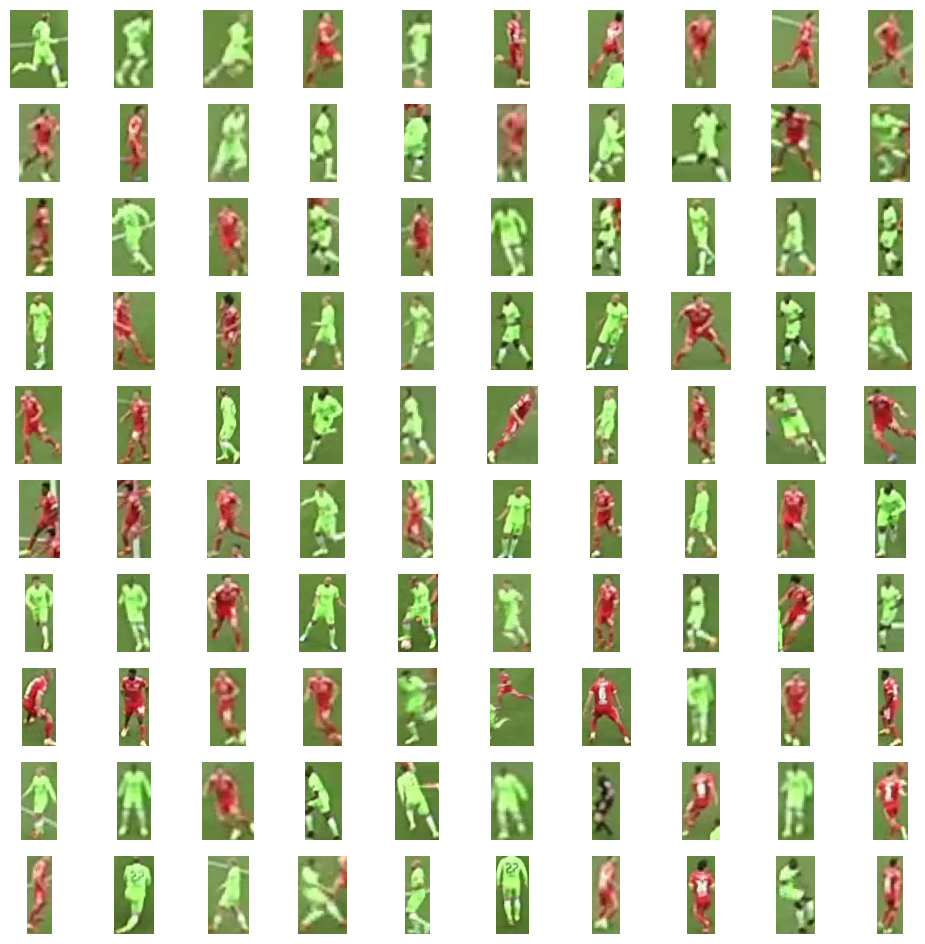

In [45]:
sv.plot_images_grid(crops[:100], grid_size=(10, 10))


In [46]:
import torch 
from transformers import AutoProcessor, SiglipVisionModel
SIGLIP_MODEL_PATH = 'google/siglip-base-patch16-224'

devise = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [47]:
preprocessor = AutoProcessor.from_pretrained(SIGLIP_MODEL_PATH)
model = SiglipVisionModel.from_pretrained(SIGLIP_MODEL_PATH).to(devise)

In [ ]:
# def chunks(lst, batch_size):
#     """Yield successive batch_size-sized chunks from lst."""
#     for i in range(0, len(lst), batch_size):
#         yield lst[i:i + batch_size]

# BATCH_SIZE = 32
# batches = list(chunks(crops, BATCH_SIZE))

# # BATCH_SIZE = 32
# # batches = [crops[i:i+BATCH_SIZE] for i in range(0, len(crops), BATCH_SIZE)]



# import numpy as np
# crops_ = [sv.cv2_to_pillow(crop) for crop in crops]

# embed = []
# with torch.no_grad():
#     for batch in tqdm(batches):
#         inputs = preprocessor(images=batch, return_tensors="pt").to(devise)
#         outputs = model(**inputs)
#         embeddings = outputs.last_hidden_state[:, 0, :].cpu().numpy()
#         embed.append(embeddings)

# embed = np.concatenate(embed)

In [48]:
import torch
import numpy as np
from tqdm import tqdm
import cv2
from PIL import Image

# ----------------------------
# Config
# ----------------------------
BATCH_SIZE = 32
device = "cuda" if torch.cuda.is_available() else "cpu"

# crops can be: file paths, cv2 images, or PIL images
# ----------------------------
# Step 1: Ensure all crops are PIL Images
# ----------------------------
crops_pil = []
for i, crop in enumerate(crops):
    if isinstance(crop, str):  # file path
        img = cv2.imread(crop)
        if img is not None:
            crops_pil.append(Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)))
    elif isinstance(crop, np.ndarray):  # cv2 image
        crops_pil.append(Image.fromarray(cv2.cvtColor(crop, cv2.COLOR_BGR2RGB)))
    elif isinstance(crop, Image.Image):  # already PIL
        crops_pil.append(crop)
    else:
        print(f"Skipping invalid item at index {i}: {type(crop)}")

# ----------------------------
# Step 2: Split into batches
# ----------------------------
batches = [crops_pil[i:i+BATCH_SIZE] for i in range(0, len(crops_pil), BATCH_SIZE)]

# ----------------------------
# Step 3: Extract embeddings
# ----------------------------
embed_list = []
with torch.no_grad():
    for batch in tqdm(batches):
        inputs = preprocessor(images=batch, return_tensors="pt").to(device)
        outputs = model(**inputs)
        embeddings = outputs.last_hidden_state[:, 0, :].cpu().numpy()  # CLS token
        embed_list.append(embeddings)

# ----------------------------
# Step 4: Concatenate all embeddings
# ----------------------------
embeddings_all = np.concatenate(embed_list, axis=0)
print("Final embeddings shape:", embeddings_all.shape)


100%|██████████| 7/7 [00:02<00:00,  2.51it/s]

Final embeddings shape: (211, 768)


In [49]:
embeddings_all.shape

(211, 768)

In [98]:
import umap
from sklearn.cluster import KMeans

REDUCER = umap.UMAP(n_components=3, random_state=42)
CLUSTERING_MODEL = KMeans(n_clusters=2)

In [99]:
projections = REDUCER.fit_transform(embeddings_all)
clusters = CLUSTERING_MODEL.fit_predict(projections)

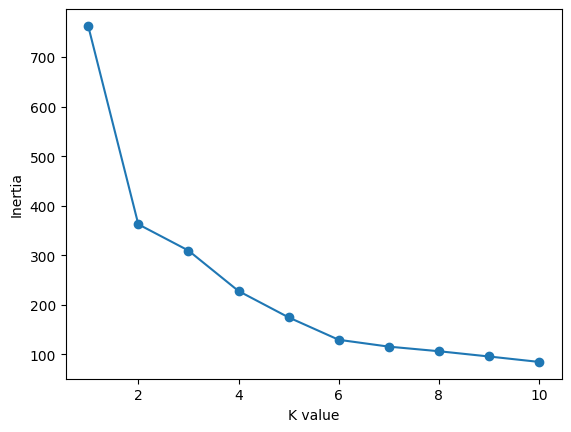

In [100]:
import matplotlib.pyplot as plt

inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(projections)
    inertia.append(kmeans.inertia_)

plt.plot(range(1,11), inertia, marker='o')
plt.xlabel("K value")
plt.ylabel("Inertia")
plt.show()


In [101]:
projections.shape

(211, 3)

In [102]:
clusters.shape

(211,)

In [103]:
clusters[:-100]

array([0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0], dtype=int32)

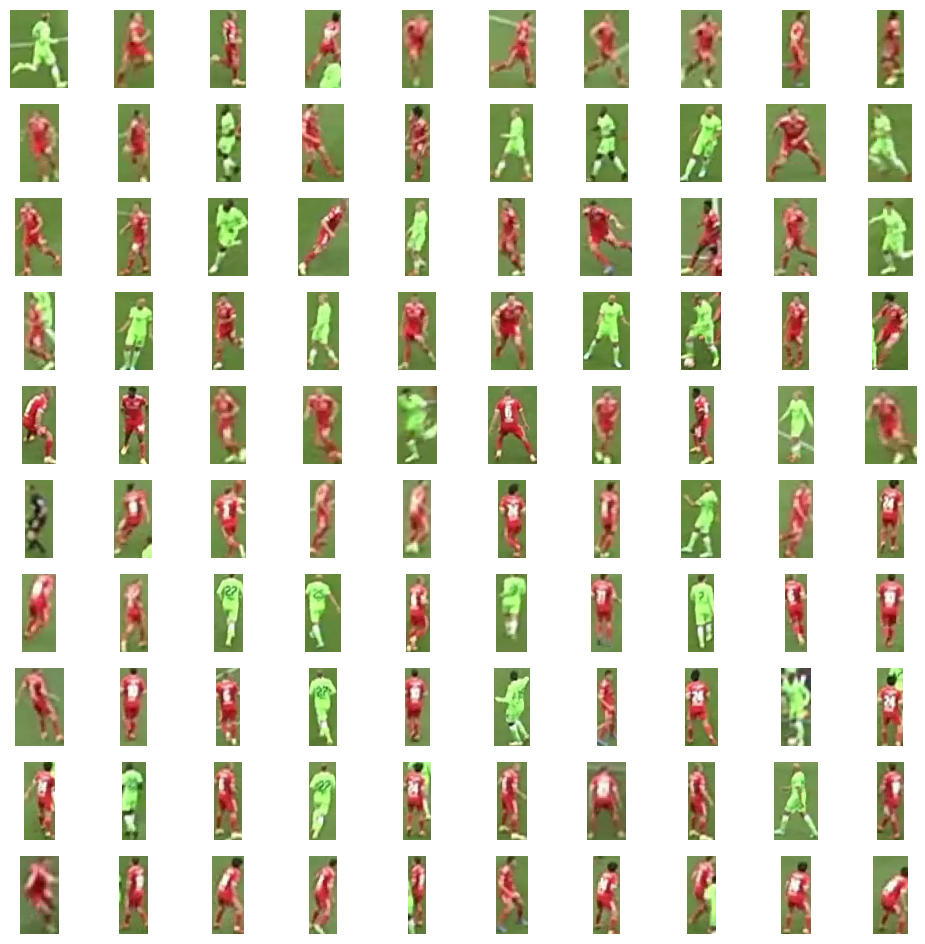

In [104]:
team0 = [crop for crop,cluster_id in zip(crops,clusters) if cluster_id ==0]
sv.plot_images_grid(team0[:100], grid_size=(10, 10))

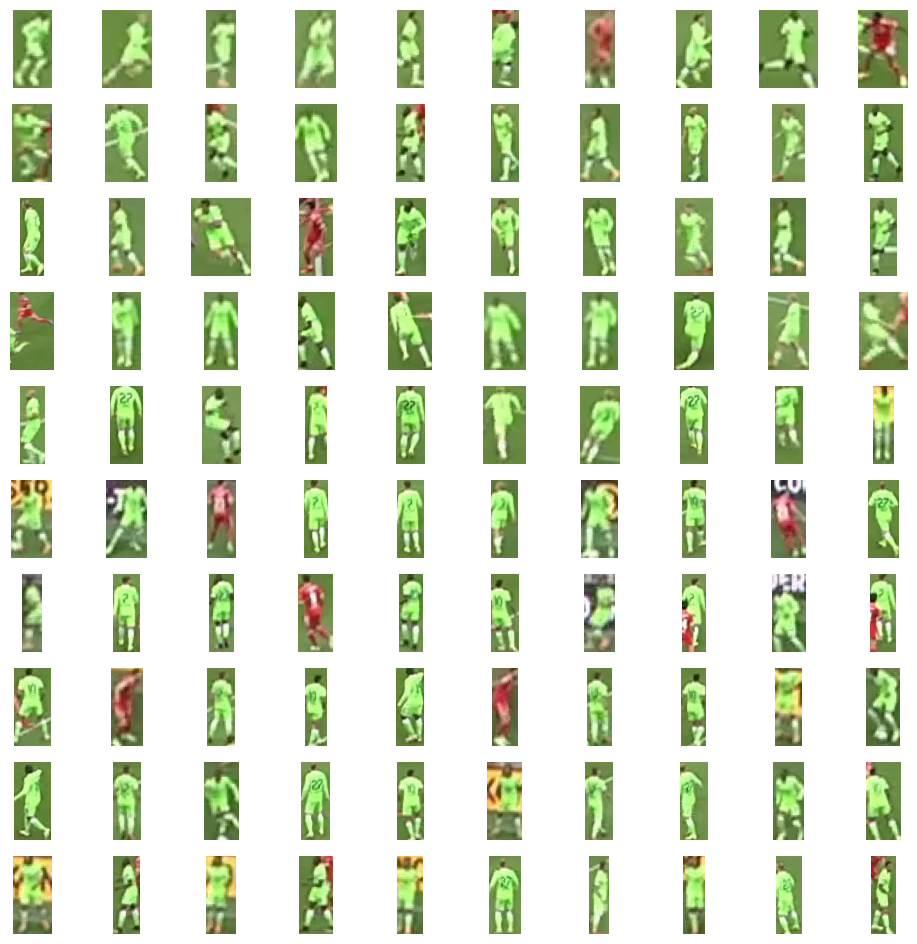

In [105]:
team1 = [crop for crop,cluster_id in zip(crops,clusters) if cluster_id ==1]
sv.plot_images_grid(team1[:100], grid_size=(10, 10))

In [1]:
!nvidia-smi

Sat Dec 20 03:58:00 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   52C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [1]:
! pip install ultralytics supervision tqdm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.4/212.4 kB 13.7 MB/s eta 0:00:00


In [2]:
!pip install -q git+https://github.com/roboflow/sports.git


  Preparing metadata (setup.py) ... done


In [3]:
!gdown "https://drive.google.com/uc?id=1gIQuv32iJtyvfoxLBkG6T2Fklq2P2TBz"
!gdown -O "121364_0.mp4" "https://drive.google.com/uc?id=1vVwjW1dE1drIdd4ZSILfbCGPD4weoNiu"
!gdown -O "0bfacc_0.mp4" "https://drive.google.com/uc?id=12TqauVZ9tLAv8kWxTTBFWtgt2hNQ4_ZF"
!gdown -O "08fd33_0.mp4" "https://drive.google.com/uc?id=1OG8K6wqUw9t7lp9ms1M48DxRhwTYciK-"


Downloading...
From: https://drive.google.com/uc?id=1gIQuv32iJtyvfoxLBkG6T2Fklq2P2TBz
To: /content/foatball350.pt
100% 22.7M/22.7M [00:00<00:00, 61.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1vVwjW1dE1drIdd4ZSILfbCGPD4weoNiu
To: /content/121364_0.mp4
100% 17.2M/17.2M [00:00<00:00, 40.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=12TqauVZ9tLAv8kWxTTBFWtgt2hNQ4_ZF
To: /content/0bfacc_0.mp4
100% 19.9M/19.9M [00:00<00:00, 52.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1OG8K6wqUw9t7lp9ms1M48DxRhwTYciK-
To: /content/08fd33_0.mp4
100% 19.9M/19.9M [00:00<00:00, 69.9MB/s]


In [4]:
# -------------------------------
# Paths
SOURCE_VIDEO_PATH = "/content/08fd33_0.mp4"  # Change your video path
TARGET_VIDEO_PATH = "/content/annotated_output_video1.mp4"


In [5]:

import supervision as sv
from tqdm import tqdm
from ultralytics import YOLO
from sports.common.team import TeamClassifier
import cv2
from IPython.display import display
from PIL import Image
import os



# Load your trained YOLO model
model = YOLO("/content/foatball350.pt")

# -------------------------------
# EXTRACT PLAYER CROPS FUNCTION
def extract_player_crops(source, stride=20):
    frame_generator = sv.get_video_frames_generator(source, stride=stride)
    crops = []

    for frame in tqdm(frame_generator, desc="Extracting Player Crops"):
        results = model.track(frame, persist=True)[0]
        detections = sv.Detections.from_ultralytics(results)
        detections = detections.with_nms(threshold=0.3, class_agnostic=True)
        detections = detections[detections.class_id == 2]  # only players

        crops += [sv.crop_image(frame, xyxy) for xyxy in detections.xyxy]

    print(f"[INFO] Total cropped player images: {len(crops)}")
    return crops




Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# -------------------------------
# TRAIN TEAM CLASSIFIER
crops = extract_player_crops(SOURCE_VIDEO_PATH, stride=20)

team_classifier = TeamClassifier()
team_classifier.fit(crops)

print(f"[INFO] Training crops: {len(crops)}")

# -------------------------------
# ANNOTATORS
box_goalkeeper = sv.BoxAnnotator(color=sv.Color.GREEN, thickness=2)
box_referee = sv.BoxAnnotator(color=sv.Color.RED, thickness=2)
ellipse_player = sv.EllipseAnnotator(
    color=sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
    thickness=2
)
triangle_ball = sv.TriangleAnnotator(color=sv.Color.YELLOW, base=25, height=20, outline_thickness=1)
label_player = sv.LabelAnnotator(
    color=sv.ColorPalette.from_hex(['#00BFFF', '#FF1493']),
    text_color=sv.Color.from_hex('#000000'),
    text_position=sv.Position.BOTTOM_CENTER
)
label_referee = sv.LabelAnnotator(color=sv.Color.RED, text_scale=0.3, smart_position=True)
label_goalkeeper = sv.LabelAnnotator(color=sv.Color.GREEN, text_scale=0.3, smart_position=True)

# -------------------------------
# TRACKER
tracker = sv.ByteTrack()
tracker.reset()

video_info = sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)
video_sink = sv.VideoSink(TARGET_VIDEO_PATH, video_info=video_info)

frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)

# -------------------------------
# PROCESS VIDEO
with video_sink:
    for frame in tqdm(frame_generator, desc="Processing Frames"):
        frame = cv2.resize(frame, (1280, 720))
        result = model.predict(frame, conf=0.5)[0]
        detections = sv.Detections.from_ultralytics(result)

        # Separate detections
        ball_detection = detections[detections.class_id == 0]
        ball_detection.xyxy = sv.pad_boxes(ball_detection.xyxy, px=5, py=5)

        player_detection = detections[detections.class_id != 0]  # everything except ball
        player_detection = player_detection.with_nms(threshold=0.3, class_agnostic=True)

        goalkeeper_detection = detections[detections.class_id == 1]
        referee_detection = detections[detections.class_id == 3]

        # Track players
        player_detection = tracker.update_with_detections(player_detection)
        player_crops = [sv.crop_image(frame, xyxy) for xyxy in player_detection.xyxy]

        # Predict team
        if len(player_crops) > 0:
            team_ids = team_classifier.predict(player_crops)
            player_detection.class_id = team_ids
        else:
            team_ids = []

        # Labels for players
        labels = [f"#{tid}" for tid in player_detection.tracker_id] if len(player_detection.tracker_id) > 0 else []

        # Annotate frame
        annotated_frame = frame.copy()
        annotated_frame = ellipse_player.annotate(annotated_frame, player_detection)
        annotated_frame = box_goalkeeper.annotate(annotated_frame, goalkeeper_detection)
        annotated_frame = box_referee.annotate(annotated_frame, referee_detection)
        if len(player_detection) > 0:
            annotated_frame = label_player.annotate(annotated_frame, player_detection, labels=labels)
        annotated_frame = label_referee.annotate(
            annotated_frame,
            referee_detection,
            labels=[f"Referee {conf:.2f}" for conf in referee_detection.confidence]
        )
        annotated_frame = label_goalkeeper.annotate(
            annotated_frame,
            goalkeeper_detection,
            labels=[f"Goalkeeper {conf:.2f}" for conf in goalkeeper_detection.confidence]
        )
        annotated_frame = triangle_ball.annotate(annotated_frame, ball_detection)

        # Write frame to video
        video_sink.write_frame(annotated_frame)



In [ ]:
# -------------------------------
# Show a frame from video in Colab
display(Image.fromarray(annotated_frame))
print(f"[INFO] Annotated video saved to {TARGET_VIDEO_PATH}")


In [ ]:
from IPython.display import Image,Video

Video("/content/annotated_output_video1.mp4")

## Complex Try detect

In [ ]:
import cv2
import os
import numpy as np
from ultralytics import YOLO
import supervision as sv
from tqdm import tqdm
from collections import defaultdict

# =========================================
# PATHS (change to your paths)
# =========================================
VIDEO_PATH = "notex/08fd33_0.mp4"
MODEL_PATH = "foatball/weights/foatball350.pt"
OUTPUT_VIDEO = "outputs/football_analytics_output.mp4"
os.makedirs("outputs", exist_ok=True)

# =========================================
# CONSTANTS
# =========================================
BALL_CLASS = 0
PLAYER_CLASS = 2
POSSESSION_DISTANCE = 60      # pixels
PITCH_WIDTH_METERS = 68       # meters
TOP_N_SPEEDS = 5              # leaderboard

# =========================================
# LOAD MODEL & TRACKER
# =========================================
model = YOLO(MODEL_PATH)
tracker = sv.ByteTrack()

# Dummy team classifier: just alternate teams
def team_classifier(player_ids):
    return [pid % 2 for pid in player_ids]  # 0 = Team A, 1 = Team B

# =========================================
# VIDEO SETUP
# =========================================
cap = cv2.VideoCapture(VIDEO_PATH)
if not cap.isOpened():
    raise RuntimeError("❌ Cannot open video")

width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS)) or 30
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
cap.release()

fourcc = cv2.VideoWriter_fourcc(*"mp4v")
out = cv2.VideoWriter(OUTPUT_VIDEO, fourcc, fps, (width, height))

METERS_PER_PIXEL = PITCH_WIDTH_METERS / width
print(f"🎥 Video Loaded | {width}x{height} | FPS: {fps}")

# =========================================
# STORAGE
# =========================================
player_positions = defaultdict(list)
player_last_position = {}
player_total_distance = defaultdict(float)
player_speeds = defaultdict(list)
player_possession_frames = defaultdict(int)

# Heatmaps
global_heatmap = np.zeros((height, width), dtype=np.float32)
team_heatmaps = {0: np.zeros((height, width), dtype=np.float32), 1: np.zeros((height, width), dtype=np.float32)}
ball_heatmap = np.zeros((height, width), dtype=np.float32)

last_possessor = None

# =========================================
# UTILS
# =========================================
def get_center(xyxy):
    x1, y1, x2, y2 = xyxy
    return np.array([(x1 + x2) / 2, (y1 + y2) / 2])

def overlay_heatmap(frame, heatmap, alpha=0.4, colormap=cv2.COLORMAP_JET):
    heatmap_blur = cv2.GaussianBlur(heatmap, (0,0), 25)
    heatmap_norm = cv2.normalize(heatmap_blur, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    heatmap_color = cv2.applyColorMap(heatmap_norm, colormap)
    return cv2.addWeighted(frame, 1-alpha, heatmap_color, alpha, 0)

# =========================================
# MAIN LOOP
# =========================================
frame_generator = sv.get_video_frames_generator(VIDEO_PATH)

for frame_idx, frame in enumerate(tqdm(frame_generator, total=total_frames, desc="Processing")):
    annotated = frame.copy()
    results = model.predict(frame, conf=0.3, verbose=False)[0]
    detections = sv.Detections.from_ultralytics(results)
    detections = tracker.update_with_detections(detections)

    ball_center = None
    player_centers = {}
    player_ids = []

    # -------------------------------
    # COLLECT DATA
    # -------------------------------
    for xyxy, cls, track_id in zip(detections.xyxy, detections.class_id, detections.tracker_id):
        center = get_center(xyxy)
        player_ids.append(track_id)

        if cls == BALL_CLASS:
            ball_center = center
            bx, by = int(center[0]), int(center[1])
            if 0 <= bx < width and 0 <= by < height:
                ball_heatmap[by, bx] += 1

        if cls == PLAYER_CLASS:
            player_centers[track_id] = center
            player_positions[track_id].append(center)

            # Update speed & distance
            if track_id in player_last_position:
                prev = player_last_position[track_id]
                pixel_dist = np.linalg.norm(center - prev)
                meter_dist = pixel_dist * METERS_PER_PIXEL
                player_total_distance[track_id] += meter_dist
                player_speeds[track_id].append(meter_dist * fps)
            player_last_position[track_id] = center

            # Update heatmaps
            x, y = int(center[0]), int(center[1])
            global_heatmap[y, x] += 1

    # -------------------------------
    # TEAM HEATMAPS
    # -------------------------------
    team_ids = team_classifier(player_ids)
    for pid, tid in zip(player_ids, team_ids):
        if pid in player_centers:
            x, y = map(int, player_centers[pid])
            team_heatmaps[tid][y, x] += 1

    # -------------------------------
    # BALL POSSESSION & PASS DETECTION
    # -------------------------------
    possessor = None
    if ball_center is not None:
        min_dist = float("inf")
        for pid, center in player_centers.items():
            dist = np.linalg.norm(ball_center - center)
            if dist < min_dist and dist < POSSESSION_DISTANCE:
                min_dist = dist
                possessor = pid

        if possessor is not None:
            player_possession_frames[possessor] += 1
            # Pass detection: draw line if possession changed
            if last_possessor is not None and last_possessor != possessor:
                start = tuple(player_centers[last_possessor].astype(int))
                end = tuple(player_centers[possessor].astype(int))
                cv2.line(annotated, start, end, (0,255,255), 2)
            last_possessor = possessor

    # -------------------------------
    # DRAW PLAYERS & BALL
    # -------------------------------
    for xyxy, cls, track_id in zip(detections.xyxy, detections.class_id, detections.tracker_id):
        x1, y1, x2, y2 = map(int, xyxy)
        color = (255,255,255)
        if cls == BALL_CLASS:
            color = (0,255,255)
        elif cls == PLAYER_CLASS:
            color = (255,0,0)
        cv2.rectangle(annotated, (x1, y1), (x2, y2), color, 2)
        cv2.putText(annotated, f"ID:{track_id}", (x1, y1-8), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    cv2.putText(annotated, f"Frame: {frame_idx}", (20,40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2)

    # -------------------------------
    # OVERLAY HEATMAPS
    # -------------------------------
    annotated = overlay_heatmap(annotated, global_heatmap, alpha=0.3, colormap=cv2.COLORMAP_JET)
    team_overlay = cv2.addWeighted(
        overlay_heatmap(annotated, team_heatmaps[0], alpha=0.3, colormap=cv2.COLORMAP_JET),
        0.5,
        overlay_heatmap(annotated, team_heatmaps[1], alpha=0.3, colormap=cv2.COLORMAP_HOT),
        0.5, 0
    )
    annotated = cv2.addWeighted(annotated, 0.7, team_overlay, 0.3, 0)
    annotated = overlay_heatmap(annotated, ball_heatmap, alpha=0.5, colormap=cv2.COLORMAP_OCEAN)

    # -------------------------------
    # TOP SPEED LEADERBOARD
    # -------------------------------
    top_speeds = sorted([(pid, np.mean(speeds)) for pid, speeds in player_speeds.items() if speeds], key=lambda x:x[1], reverse=True)[:TOP_N_SPEEDS]
    y_offset = 50
    for rank, (pid, speed) in enumerate(top_speeds, 1):
        cv2.putText(annotated, f"{rank}. Player {pid}: {speed:.2f} m/s", (width-300, y_offset), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255,255,255), 2)
        y_offset += 30

    # -------------------------------
    # WRITE & DISPLAY
    # -------------------------------
    out.write(annotated)
    cv2.imshow("Football Analytics Dashboard", annotated)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()
out.release()
print("✅ Output video saved:", OUTPUT_VIDEO)

# =========================================
# OFFLINE HEATMAP IMAGES
# =========================================
HEATMAP_DIR = "outputs/heatmaps"
os.makedirs(HEATMAP_DIR, exist_ok=True)

for pid, positions in player_positions.items():
    heatmap = np.zeros((height,width), dtype=np.float32)
    for x, y in positions:
        x, y = int(x), int(y)
        if 0 <= x < width and 0 <= y < height:
            heatmap[y, x] += 1
    heatmap = cv2.GaussianBlur(heatmap, (0,0), 25)
    heatmap_color = cv2.applyColorMap(cv2.normalize(heatmap,None,0,255,cv2.NORM_MINMAX).astype(np.uint8), cv2.COLORMAP_JET)
    # overlay = cv2.addWeighted(heatmap, 0.6, heatmap_color, 0.4, 0)
    # cv2.imwrite(f"{HEATMAP_DIR}/player_{pid}.jpg", overlay)

print("🔥 Heatmaps saved in", HEATMAP_DIR)

# =========================================
# FINAL PLAYER STATS
# =========================================
print("\n📊 PLAYER STATS")
for pid in player_total_distance:
    possession_sec = player_possession_frames[pid] / fps
    avg_speed = np.mean(player_speeds[pid]) if player_speeds[pid] else 0
    print(f"Player {pid} | Distance: {player_total_distance[pid]:.2f} m | Avg Speed: {avg_speed:.2f} m/s | Possession: {possession_sec:.2f} s")





